In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import math
df = pd.read_csv("Linear Data.csv")
df

,Length (m),Avg. Period
0,0.787,1.89
1,0.695,1.71
2,0.590,1.44
3,0.500,1.33
4,0.360,1.21
5,0.290,1.09


In [3]:
length_mean = df.iloc[:,0].mean()
length_std = df.iloc[:,0].std()
print(length_mean, length_std)
sum(df.iloc[0:6,0])/6

0.537 0.19182283492848293


0.537

In [4]:
period_mean = df.iloc[:,1].mean()
period_std = df.iloc[:,1].std()
print(period_mean, period_std)

1.445 0.3042203149035251


In [5]:
x_variance = []
y_variance = []
for i in range(6):
    x_variance.append((df.iloc[i,0] - length_mean)**2)
for i in range(6):
    y_variance.append((df.iloc[i,1] - period_mean)**2)

In [6]:
df['S_xx'] = x_variance
df['S_yy'] = y_variance

In [7]:
covariance = []
for i in range(6):
    covariance.append((df.iloc[i,0] - length_mean)*(df.iloc[i,1] - period_mean))
df['S_xy'] = covariance
#df.plot(kind='scatter', x='S_xx', y='S_yy')
df

,Length (m),Avg. Period,S_xx,S_yy,S_xy
0,0.787,1.89,0.062500,0.198025,0.111250
1,0.695,1.71,0.024964,0.070225,0.041870
2,0.590,1.44,0.002809,0.000025,-0.000265
3,0.500,1.33,0.001369,0.013225,0.004255
4,0.360,1.21,0.031329,0.055225,0.041595
5,0.290,1.09,0.061009,0.126025,0.087685


In [8]:
s_xx_sum = sum(df['S_xx'])
s_yy_sum = sum(df['S_yy'])
s_xy_sum = sum(df['S_xy'])
print(f"The s_xx sum is {s_xx_sum}, the s_yy sum is {s_yy_sum}, and the s_xy sum is {s_xy_sum}")

The s_xx sum is 0.18398, the s_yy sum is 0.4627499999999999, and the s_xy sum is 0.28639


In [9]:
r = s_xy_sum/(math.sqrt(s_xx_sum)*math.sqrt(s_yy_sum))
r_squared = r ** 2
print(f"r is {r} and r squared is {r_squared}")

r is 0.9815203955758911 and r squared is 0.9633822869314538


<Axes: xlabel='Length (m)', ylabel='Avg. Period'>

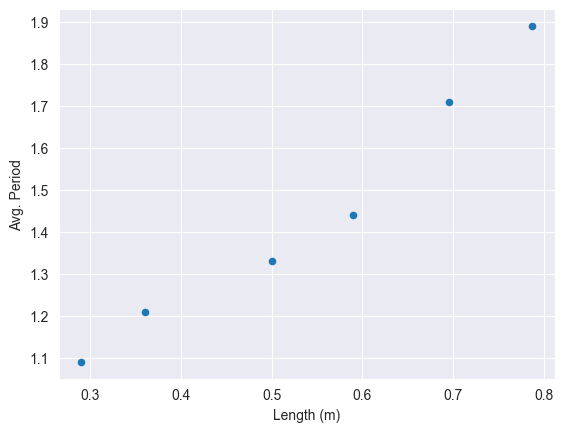

In [10]:
df.plot(kind='scatter', x='Length (m)', y='Avg. Period')

In [11]:
slope = s_xy_sum/s_xx_sum
intercept = (period_mean)-(slope*length_mean)
print(slope, intercept)

1.556636590933797 0.6090861506685511


In [12]:
squared_error = []
for i in range(6):
    squared_error.append((df.iloc[i,1]-(slope*df.iloc[i,0]+intercept)) ** 2)
squared_error

[0.003118200781854749,
 0.00036295655190924254,
 0.007656554383936198,
 0.0032952704361177212,
 0.001642249413152199,
 0.0008696151554997201]

In [13]:
df['Squared Error'] = squared_error
SSE = sum(df['Squared Error'])
SSE

0.01694484672246983

In [14]:
# This is my final data
print(f"r is {r} and r squared is {r_squared}")
print(f"The s_xx sum is {s_xx_sum}, the s_yy sum is {s_yy_sum}, and the s_xy sum is {s_xy_sum}\n")
print(f'SSE is {SSE}\n')
print(f'Slope is {slope}')
print(f'Intercept is {intercept}')

r is 0.9815203955758911 and r squared is 0.9633822869314538
The s_xx sum is 0.18398, the s_yy sum is 0.4627499999999999, and the s_xy sum is 0.28639

SSE is 0.01694484672246983

Slope is 1.556636590933797
Intercept is 0.6090861506685511


In [20]:
df

,Length (m),Avg. Period,S_xx,S_yy,S_xy,Squared Error
0,0.787,1.89,0.062500,0.198025,0.111250,0.003118
1,0.695,1.71,0.024964,0.070225,0.041870,0.000363
2,0.590,1.44,0.002809,0.000025,-0.000265,0.007657
3,0.500,1.33,0.001369,0.013225,0.004255,0.003295
4,0.360,1.21,0.031329,0.055225,0.041595,0.001642
5,0.290,1.09,0.061009,0.126025,0.087685,0.000870


<Axes: xlabel='Length (m)', ylabel='Avg. Period'>

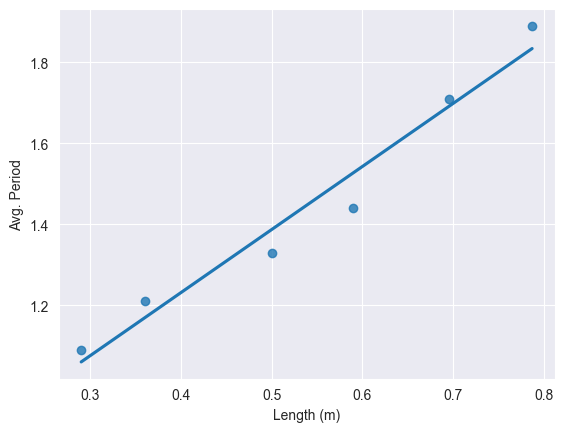

In [28]:
import seaborn as sns
sns.regplot(data=df, x="Length (m)", y="Avg. Period", ci=None, label="Hello")